#**CLASSIFICATION**

#Importing Libraries

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from google.colab import files
uploaded = files.upload()

Saving UCI_CREDITCARD.csv to UCI_CREDITCARD (1).csv


##1.Splitting the Data
### Loading the Data

In [6]:
#df = pd.read_csv('UCI_CRERDITCARD.csv')
#df.head()

import io
df = pd.read_csv(io.BytesIO(uploaded['UCI_CREDITCARD.csv']))
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102.0,689.0,0,0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682,1725.0,2682.0,3272,3455,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239,14027.0,13559.0,14331,14948,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990,48233.0,49291.0,28314,28959,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617,5670.0,35835.0,20940,19146,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


###Data set description
There are 25 variables:

1. ID: ID of each client
2. LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
3. SEX: Gender (1=male, 2=female)
4. EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
5. MARRIAGE: Marital status (1=married, 2=single, 3=others)
6. AGE: Age in years
7. PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)
8. PAY_2: Repayment status in August, 2005 (scale same as above)
9. PAY_3: Repayment status in July, 2005 (scale same as above)
10. PAY_4: Repayment status in June, 2005 (scale same as above)
11. PAY_5: Repayment status in May, 2005 (scale same as above)
12. PAY_6: Repayment status in April, 2005 (scale same as above)
13. BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
14. BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
15. BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
16. BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
17. BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
18. BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
19. PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
20. PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
21. PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
22. PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
23. PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
24. PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
25. default.payment.next.month: Default payment (1=yes, 0=no)

In [7]:
print(df.columns)
print(df.shape)

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')
(4998, 25)


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4998 entries, 0 to 4997
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          4998 non-null   int64  
 1   LIMIT_BAL                   4998 non-null   float64
 2   SEX                         4998 non-null   int64  
 3   EDUCATION                   4998 non-null   int64  
 4   MARRIAGE                    4998 non-null   int64  
 5   AGE                         4998 non-null   int64  
 6   PAY_0                       4998 non-null   int64  
 7   PAY_2                       4998 non-null   int64  
 8   PAY_3                       4998 non-null   int64  
 9   PAY_4                       4998 non-null   int64  
 10  PAY_5                       4998 non-null   int64  
 11  PAY_6                       4998 non-null   int64  
 12  BILL_AMT1                   4998 non-null   int64  
 13  BILL_AMT2                   4998 

In [9]:
#Checking for missing values
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

###Randomly adding missing values

As there are no missing values, we have added missing values randomly and later on replaced them with median

In [10]:
print(df.iloc[0:5,0:4])

nan_mat = np.random.random(df.shape)<0.5
nan_mat

nan_mat.sum()

df_NaN = df.mask(nan_mat)
df_NaN = df.mask(np.random.random(df.shape)<0.05)
df_NaN
df_NaN.isnull().sum(axis = 0).sum()

   ID  LIMIT_BAL  SEX  EDUCATION
0   1    20000.0    2          2
1   2   120000.0    2          2
2   3    90000.0    2          2
3   4    50000.0    2          2
4   5    50000.0    1          2


6281

In [11]:
#checking for the missing values
df_NaN.isnull().sum()

ID                            258
LIMIT_BAL                     246
SEX                           250
EDUCATION                     230
MARRIAGE                      232
AGE                           246
PAY_0                         266
PAY_2                         276
PAY_3                         235
PAY_4                         231
PAY_5                         243
PAY_6                         263
BILL_AMT1                     234
BILL_AMT2                     235
BILL_AMT3                     254
BILL_AMT4                     249
BILL_AMT5                     284
BILL_AMT6                     267
PAY_AMT1                      271
PAY_AMT2                      255
PAY_AMT3                      254
PAY_AMT4                      263
PAY_AMT5                      249
PAY_AMT6                      263
default.payment.next.month    227
dtype: int64

In [12]:
##Replace the missing values with the Median
df1 = df_NaN.fillna(df_NaN.median())
df1

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1.0,20000.0,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,-2.0,3913.0,3102.0,689.0,0.0,17359.5,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2.0,120000.0,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,2.0,2682.0,1725.0,2682.0,3272.0,17359.5,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3.0,90000.0,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,2487.5,50000.0,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,0.0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5.0,50000.0,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,0.0,8617.0,5670.0,35835.0,18100.0,19146.0,19131.0,2000.0,2000.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4993,4994.0,160000.0,2.0,3.0,2.0,58.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,2034.0,68942.0,40194.0,942.0,942.0,15846.0,68942.0,40194.0,942.0,942.0,942.0,942.0,0.0
4994,4995.0,500000.0,2.0,1.0,2.0,40.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,15929.0,18155.0,-131.0,10527.0,61751.0,2926.0,18222.0,0.0,10658.0,61751.0,2926.0,13609.0,0.0
4995,4996.0,20000.0,2.0,2.0,1.0,36.0,0.0,0.0,0.0,0.0,0.0,0.0,16320.0,18044.0,19003.0,19224.0,19050.0,19353.0,2000.0,1283.0,1003.0,1000.0,1002.0,1005.0,0.0
4996,4997.0,180000.0,2.0,4.0,1.0,34.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,6892.0,20501.0,6892.0,6282.0,8282.0,0.0,6892.0,6892.0,6282.0,2000.0,0.0,0.0,0.0


In [13]:
df1.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

###Train Test Split
In order to test the models, we have separated the data into smaller train and test datasets.

In [14]:
train, test = train_test_split(df1, test_size = 0.4, random_state = 0)

test_solution = test['default.payment.next.month']
test = test.drop('default.payment.next.month', axis = 1)

##2. Exploratory Data Analysis

In [15]:
train.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000
mean,2486.205637,164786.524350,1.591394,1.833889,1.587058,35.406604,0.007005,-0.149433,-0.157438,-0.241161,-0.261841,-0.270180,48559.285023,46427.512675,43660.352235,39541.340227,37766.658105,36342.064710,5394.687458,5475.902268,4404.862241,4730.708472,4531.350233,5143.397598,0.215477
std,1398.118572,128423.376723,0.491658,0.761362,0.520125,9.077014,1.115734,1.160042,1.193309,1.104884,1.086124,1.132107,74201.514799,71353.275657,66393.325181,63684.880430,60286.854909,60745.911461,14828.454237,17316.849399,20362.599986,16818.248710,14759.468106,20431.271584,0.411221
min,1.000000,10000.000000,1.000000,1.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-14386.000000,-24704.000000,-15000.000000,-170000.000000,-20006.000000,-51183.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1303.500000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3172.500000,3203.000000,2764.750000,2162.500000,1664.250000,1191.000000,1000.000000,736.500000,261.000000,303.250000,300.500000,0.000000,0.000000
50%,2487.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21210.500000,20501.000000,19632.000000,18100.000000,17359.500000,15846.000000,2103.000000,2000.000000,1400.000000,1500.000000,1500.000000,1339.000000,0.000000
75%,3665.500000,230000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,57542.500000,55352.750000,50610.000000,46801.500000,44953.000000,43489.000000,5000.000000,4227.000000,3500.000000,3600.000000,3625.750000,3566.000000,0.000000
max,4998.000000,1000000.000000,2.000000,6.000000,3.000000,73.000000,8.000000,7.000000,7.000000,7.000000,7.000000,7.000000,964511.000000,983931.000000,578971.000000,891586.000000,927171.000000,961664.000000,368199.000000,344261.000000,896040.000000,497000.000000,326889.000000,528666.000000,1.000000


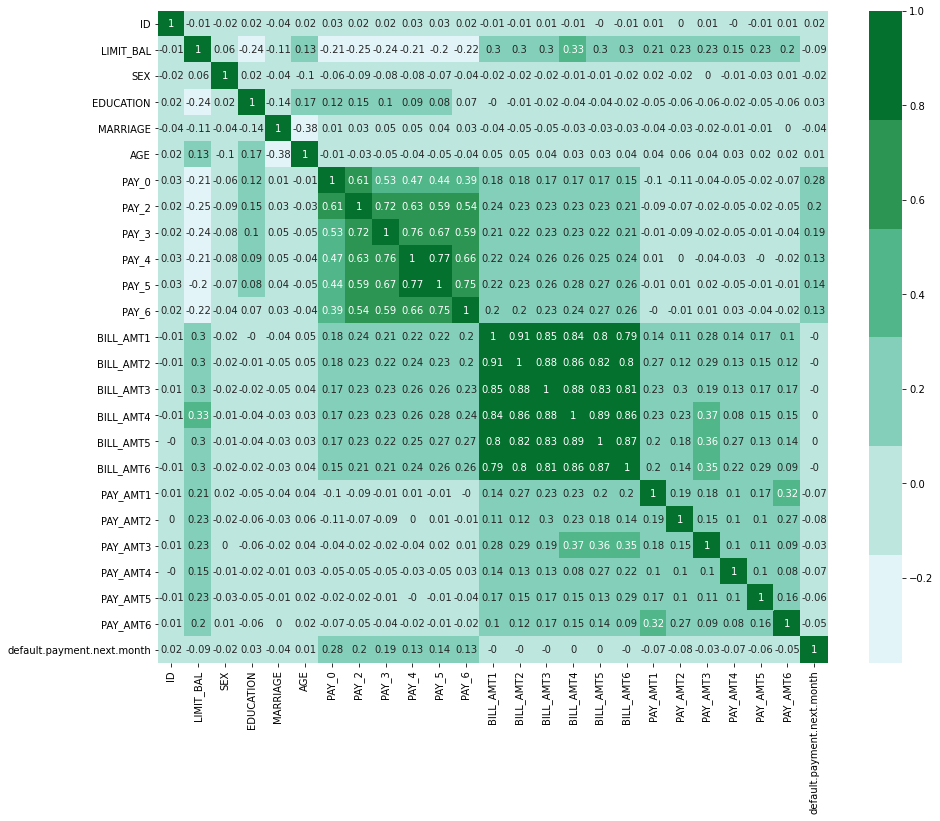

In [16]:
#looking for the strongest predictors
plt.figure(figsize=(15,12))
cor = round(train.corr(),2)
sns.heatmap(cor, cmap = sns.color_palette('BuGn'), annot = True)

**Observation**: The PAY_# variable seems to be the most correlated with the default payment variable.

Based on the data description, the measurement scale for repayment status is as follows:

-1 = pay duly, or paid properly
1 = payment delay for one month
2 = payment delay for 2 months
and so on

**Observation**:
It seems like whether repayment was paid duly or delayed is an important indicator of whether or not default payment will occur next month. 

In [17]:
# Function to get default payment means 
def get_pay_mean(PAY_NUM):
    temp = train[[PAY_NUM, 'default.payment.next.month']].groupby([PAY_NUM], as_index = True).mean()
    pay_mean = temp['default.payment.next.month']
    return pay_mean

In [18]:
pay_means = {}
for i in ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']:
    pay_means[i] = get_pay_mean(i)
pay_means_results = pd.DataFrame(pay_means)
#pay_means_results.reset_index(level=0, inplace=True)
pay_means_results

,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
-2.0,0.109005,0.213018,0.207756,0.224490,0.221945,0.227378
-1.0,0.187809,0.170047,0.158805,0.170648,0.174419,0.177847
0.0,0.133158,0.160912,0.179551,0.188940,0.186954,0.183002
1.0,0.346774,0.000000,0.000000,NaN,NaN,NaN
2.0,0.604000,0.516949,0.439776,0.440816,0.467213,0.427536
3.0,0.600000,0.500000,0.687500,0.600000,0.555556,0.571429
4.0,0.800000,0.500000,0.625000,0.714286,0.363636,0.000000
5.0,1.000000,1.000000,0.750000,0.285714,0.000000,NaN
6.0,1.000000,1.000000,0.333333,0.000000,NaN,0.750000
7.0,1.000000,0.200000,0.800000,0.750000,0.750000,0.666667


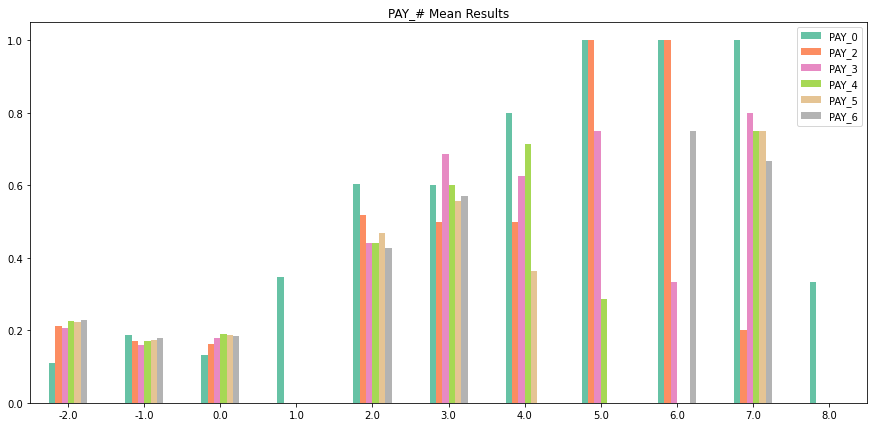

In [19]:
pay_means_results.plot(kind = 'bar', title = 'PAY_# Mean Results', figsize=(15, 7), legend=True, rot = 0, colormap = 'Set2')

**Obseration**: By plotting all the different repayment months , we tried to see if there was any general patterns. Those who paid duly (-2, -1, 0) had the lowest chance of default payment next month and those who paid late, have a higher chance of default payment next month.

**Limit Balance**
LIMIT_BAL corresponds to the given credit of the card holder and its family members. Those with good credit score, and higher income, are granted a higher credit card limit.

Text(0.5, 1.05, 'Limit Balance and Default Rate Distribution')

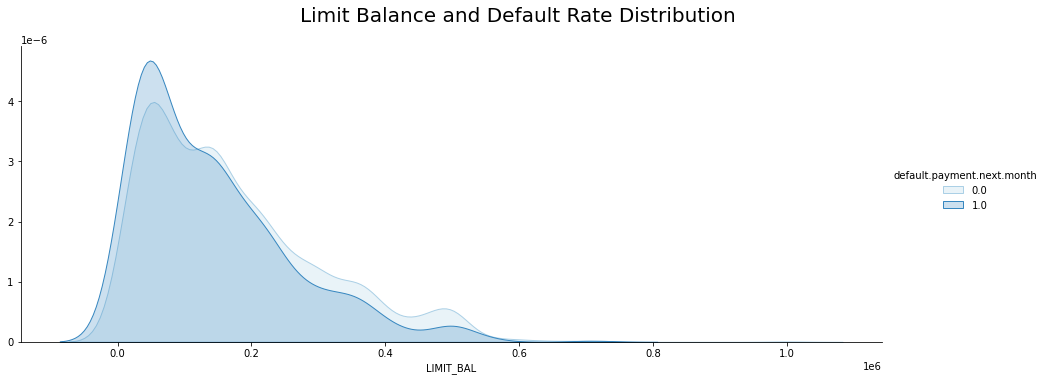

In [20]:
limitBal_survival_dist = sns.FacetGrid(train, hue = 'default.payment.next.month', aspect = 2.5, height = 5, palette = 'Blues')
limitBal_survival_dist.map(sns.kdeplot, 'LIMIT_BAL', shade = True)
limitBal_survival_dist.add_legend()
plt.suptitle('Limit Balance and Default Rate Distribution', fontsize = 20, y = 1.05)

**Observations:**
It seems like those with lower credit limits are more likely to default, whereas those with higher credit limits are less likely to default.

### Exploring the Demographic Variables

**Age**
Based on the table above, 50% of credit card holders fall somewhere between 28-42, with the average at 35. The oldest person with a credit card in the train set is 75 whereas the youngest person is 21.

Text(0.5, 1.05, 'Age and Default Rate Distribution')

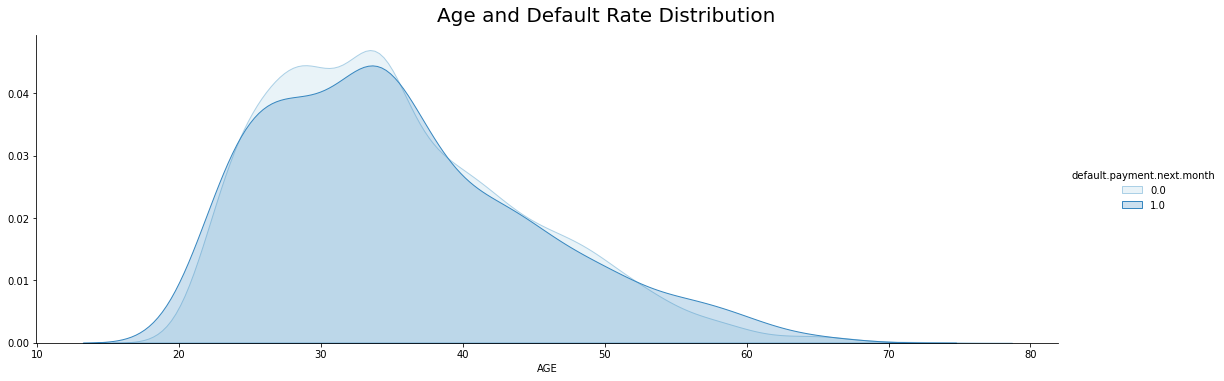

In [21]:
age_survival_dist = sns.FacetGrid(train, hue = 'default.payment.next.month', aspect = 3, height = 5, palette = 'Blues')
age_survival_dist.map(sns.kdeplot, 'AGE', shade = True)
age_survival_dist.add_legend()
plt.suptitle('Age and Default Rate Distribution', fontsize = 20, y = 1.05)

**Observation:**
Based on the graph, the distributions are quite similar and it doesn't seem like age plays a large role in whether or not the card holder will default payment next month. However, those who are in their 25-40 have a slightly lower chance of default.

**Sex**
1 stands for male and 2 stands for female.

In [22]:
train[['SEX', 'default.payment.next.month']].groupby(['SEX'], as_index = False).mean()

,SEX,default.payment.next.month
0,1.0,0.223673
1,2.0,0.209814


**Obseration**:
The difference between being male and female have a very small affect on whether or not the client will default payment next month. There is a slightly higher chance if you are male.

**Marriage**
Marriage is classified into 1 = married, 2 = single and 3 = other.

In [23]:
train[['MARRIAGE', 'default.payment.next.month']].groupby(['MARRIAGE'], as_index = False).mean()

,MARRIAGE,default.payment.next.month
0,0.0,0.000000
1,1.0,0.236926
2,2.0,0.200118
3,3.0,0.222222


**Observation**:
Those who are single have a slightly lower chance of defaulting than married or other.

**Education**
Education is classified as 1 = graduate school, 2 = university, 3 = high school and 4 = other.

In [24]:
train[['EDUCATION', 'default.payment.next.month']].groupby(['EDUCATION'], as_index = False).mean()

,EDUCATION,default.payment.next.month
0,1.0,0.191985
1,2.0,0.227046
2,3.0,0.242363
3,4.0,0.000000
4,5.0,0.125000
5,6.0,0.000000


**Observation**:
Those with higher education have a lower chance of defaulting. Those in order have a lower chance of default.

##3. Data Preprocessing

###Cleaning the Data

In [25]:
#Cleaning the data
credit_card = train.append(test, ignore_index = True)

credit_card['MARRIAGE'].replace(0, 3, inplace = True)
credit_card['EDUCATION'].replace([0, 5, 6], 4, inplace = True)

Droping the irrelevant columns

In [26]:
credit_card = credit_card.drop(['ID'], axis = 1)
credit_card.shape

(4998, 24)

In [27]:
train_cleaned = credit_card[0:2499]
test_cleaned = credit_card[2499:4999]

##4.MODELLING

The algorithms that we have implemented are:

1. Logistic Regression
2. KNN
3. Decision Tree
4. SVM
5. Kernalized SVM

Performance metric used is accuracy.



In [28]:
#Modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
#from tqdm import tqdm
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV

In [29]:
#train test split
features = train_cleaned.drop('default.payment.next.month', axis=1)
target = train_cleaned['default.payment.next.month']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.4, random_state=0)

Logistic Regression

In [30]:
#Logistic Regression

logr = LogisticRegression()
logr_parameters = {'penalty': ['l1', 'l2'], 
                   'C' : [10, 20, 30, 40, 50, 60]
                  }

acc_scorer = make_scorer(accuracy_score)

# Run the 10-fold grid search
grid_obj = GridSearchCV(logr, logr_parameters, cv = 10, scoring = acc_scorer)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the algorithm to the best combination of parameters
logr = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
logr.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITER

LogisticRegression(C=20, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [31]:
logr.predict(X_test)
round(logr.score(X_train, y_train) * 100, 2)

79.05

K-Nearest Neighbours

In [32]:
#KNN
knn = KNeighborsClassifier()
knn_parameters = {'n_neighbors': range(6,9),
                  'leaf_size': [3, 5, 7, 10]
                 }

acc_scorer = make_scorer(accuracy_score)

# Run the 10-fold grid search
grid_obj = GridSearchCV(knn, knn_parameters, cv = 10, scoring = acc_scorer)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the algorithm to the best combination of parameters
knn = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=3, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                     weights='uniform')

In [33]:
knn.predict(X_test)
round(knn.score(X_train, y_train) * 100, 2)

79.99

Decision Tree Classifier

In [34]:
#Decision tree classifier
dt = DecisionTreeClassifier()
dt_parameters = {'max_depth': [2,6,10], 
                 'min_samples_split': range(2,5),
                 'min_samples_leaf': range(1,5),
                 'max_features': [5, 10, 15]   
                }

acc_scorer = make_scorer(accuracy_score)

# Run the 10-fold grid search
grid_obj = GridSearchCV(dt, dt_parameters, cv = 10, scoring = acc_scorer)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the algorithm to the best combination of parameters
dt = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=15, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [35]:
dt.predict(X_test)
round(dt.score(X_train, y_train) * 100, 2)

81.19

Linear Support Vector Machine

In [40]:
from sklearn.svm import SVC
from sklearn.svm import LinearSVC

In [41]:
train_cleaned = credit_card[0:2499]
test_cleaned = credit_card[2499:4999]
features = train_cleaned.drop('default.payment.next.month', axis=1)
target = train_cleaned['default.payment.next.month']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.4, random_state=0)
clf = SVC(kernel = 'linear', C = 1, random_state = 0).fit(X_train, y_train)

In [42]:
classifier_predictions=clf.predict(X_test)
print(accuracy_score(y_test,classifier_predictions)*100)

77.2


Kerenilzed Support Vector Machine

1. Polynomial Kernel

In [37]:
#Polynomial Kernel
from sklearn.svm import SVC
svclassifier = SVC(kernel='poly', degree=8)
svclassifier.fit(X_train, y_train)

y_pred = svclassifier.predict(X_test)
print("Accuracy score:",accuracy_score(y_test,y_pred)*100)


76.0


2. Gaussian Kernel

In [38]:
#Gaussian Kernel
from sklearn.svm import SVC
svclassifier = SVC(kernel='rbf')
svclassifier.fit(X_train, y_train)

y_pred = svclassifier.predict(X_test)
print("Accuracy score:", accuracy_score(y_test,y_pred)*100)



77.9


3. Linear Kernel

In [39]:
#Linear Kernel
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

y_pred = svclassifier.predict(X_test)
print("Accuracy score:",accuracy_score(y_test,y_pred)*100)


77.2


###Results:
Based on our results, **Decision Tree Classifier** was the best performer with an accuracy of 81.19%. 
Following are the hyperparameters:
criterion='gini', max_depth=2, max_features=15, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, 
